
# Definite Analysis of Test Scores


### Analyzing the individual impact categorical variables have on test scores

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:

df = pd.read_csv('./StudentsPerformance.csv',sep=',')


In [108]:

categorical = []

for c in df.columns:
    if df.dtypes[c] == 'object':
        categorical.append(c)
        
print(categorical)


['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


In [4]:

ints = []

for c in df.columns:
    print(c)
    if df.dtypes[c] == np.int64:
        ints.append(c)
        
print(ints)


gender
race/ethnicity
parental level of education
lunch
test preparation course
math score
reading score
writing score
['math score', 'reading score', 'writing score']


In [5]:

independent_variables = ['math score','writing score','reading score']



## Overall scores


In [115]:
df['Total Scores'] = df['math score'] + df['writing score'] + df['reading score']


In [116]:
df['Total Average Scores'] = df['Total Scores'] / 3


## Mean scores depending on gender

In [118]:
male = df[df['gender'] == 'male']
female = df[df['gender'] == 'female']


In [120]:

male_ms = male['math score'].mean()
male_rs = male['reading score'].mean()
male_ws = male['writing score'].mean()

female_ms = female['math score'].mean()
female_rs = female['reading score'].mean()
female_ws = female['writing score'].mean()


sample_male_ms = male['math score'].sum() / (male.shape[0] - 1)
sample_male_rs = male['reading score'].sum() / (male.shape[0] - 1)
sample_male_ws = male['writing score'].sum() / (male.shape[0] - 1)

sample_female_ms = female['math score'].sum() / (male.shape[0] - 1)
sample_female_rs = female['reading score'].sum() / (male.shape[0] - 1)
sample_female_ws = female['writing score'].sum() / (male.shape[0] - 1)

print(male_ms)
print(sample_male_ms)


68.72821576763485
68.87110187110187


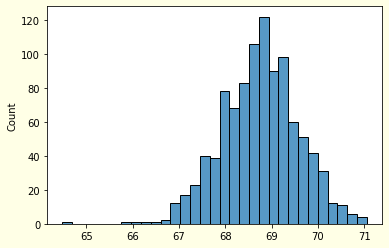

In [136]:
from random import choices

sample_means = [np.array(choices(male['math score'].values, k=300)).mean() for i in range(1000)]
    
sns.histplot(x=sample_means)
plt.show()

## Analyzing counts per categorical variables

Observations: 
    <li> The data has slightly more information about females than males. </li>
    <li> Very few students come from families were parents have a master's or bacherlor's degree. </li>
    <li> Students from race/ethnicity of group C and group D make up almost half of the dataset. </li>

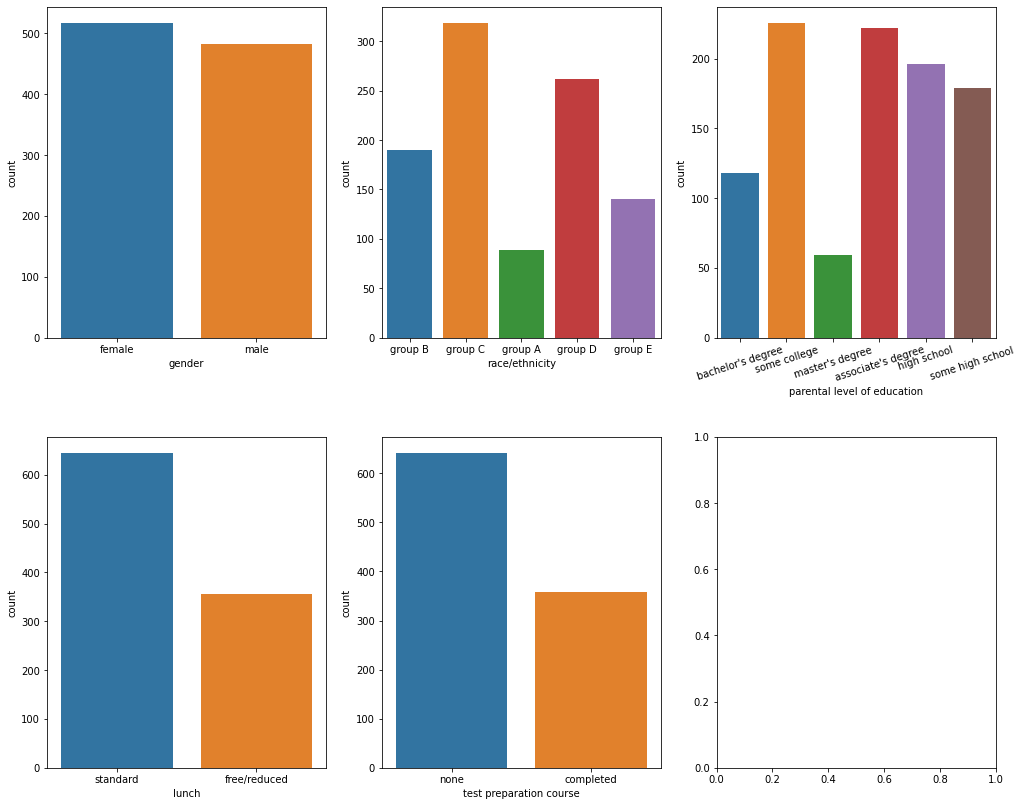

In [36]:


fig, ax = plt.subplots(ncols=3,nrows=2,figsize=(17,14))

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.3)

#fig.tight_layout()

ax[0,2].tick_params(axis='x',rotation=18)

sns.countplot(x=categorical[0],data=df,ax=ax[0,0])
sns.countplot(x=categorical[1],data=df,ax=ax[0,1])
sns.countplot(x=categorical[2],data=df,ax=ax[0,2])
sns.countplot(x=categorical[3],data=df,ax=ax[1,0])
sns.countplot(x=categorical[4],data=df,ax=ax[1,1])

plt.show()

        


## Race level analysis

Observations:
    <li> Group E seems to have higher proportions of students with characteristics that would be considered beneficial 
     for test scores. </li>
    <li> Group E has a higher proportion of students that have completed a test preparation course. </li>
    <li> Group E has a higher proportion of students that eat a standard lunch. </li>
    <li> For the 3 test scores, the average grade attained by students of Group E is higher than all others (mean). </li>
    <li> For math and reading test scores, the average student of Group E attained higher grades than all others, while  for writing scores, Group E and Group D have equal scores for the average student (median). </li>
    

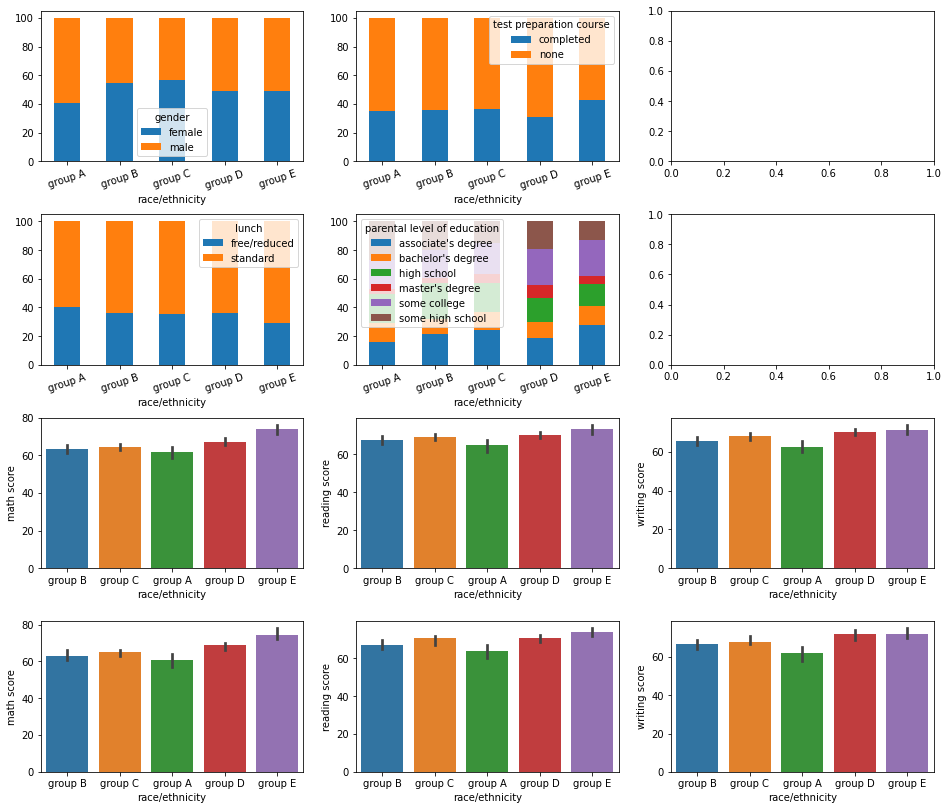

In [94]:

fig, ax = plt.subplots(nrows=4,ncols=3,figsize=(16,14))

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.35)

to_graph1 = pd.crosstab(index=df['race/ethnicity'],columns=df['gender'],normalize='index') * 100
to_graph1.plot.bar(stacked=True, ax=ax[0,0])
ax[0,0].tick_params(axis='x',rotation=18)
#sns.countplot(x='race/ethnicity',hue='gender',data=df,ax=ax[0,0])

to_graph2 = pd.crosstab(index=df['race/ethnicity'],columns=df['test preparation course'],normalize='index') * 100
to_graph2.plot.bar(stacked=True, ax=ax[0,1])
ax[0,1].tick_params(axis='x',rotation=18)
#sns.countplot(x='race/ethnicity',hue='test preparation course',data=df,ax=ax[0,1])

to_graph3 = pd.crosstab(index=df['race/ethnicity'],columns=df['lunch'],normalize='index') * 100
to_graph3.plot.bar(stacked=True, ax=ax[1,0])
ax[1,0].tick_params(axis='x',rotation=18)
#sns.countplot(x='race/ethnicity',hue='lunch',data=df,ax=ax[1,0])

to_graph4 = pd.crosstab(index=df['race/ethnicity'],columns=df['parental level of education'],normalize='index') * 100
to_graph4.plot.bar(stacked=True, ax=ax[1,1])
ax[1,1].tick_params(axis='x',rotation=18)
#sns.countplot(x='race/ethnicity',hue='parental level of education',data=df,ax=ax[1,1])

sns.barplot(x='race/ethnicity',y='math score', data=df, ax=ax[2,0])
sns.barplot(x='race/ethnicity',y='reading score', data=df, ax=ax[2,1])
sns.barplot(x='race/ethnicity',y='writing score', data=df, ax=ax[2,2])

sns.barplot(x='race/ethnicity',y='math score', data=df, ax=ax[3,0], estimator=np.median)
sns.barplot(x='race/ethnicity',y='reading score', data=df, ax=ax[3,1], estimator=np.median)
sns.barplot(x='race/ethnicity',y='writing score', data=df, ax=ax[3,2], estimator=np.median)

plt.show()



## Gender level analysis


Observations:
    <li> Men perform better than women on math scores, whereas women perform better than men at reading and writing scores. </li>
    <li> When controlling for different categorical variables, it is seen that the difference between men and women are still present. </li>
    <li> When we control for race/ethnicity, we see that the difference in math scores between males and females becomes weaker. This is only true for Group B. </li>
    <li> When we control for parental level of education, we see that the difference in math scores between males and females becomes almost nonexistent. This is only true for students coming from households where parents have either a bacherlor's degree or some college exposure.</li>
    
    

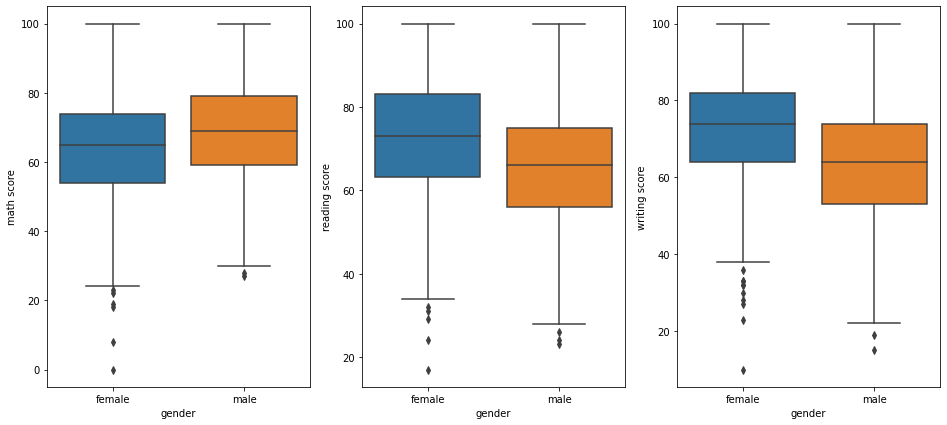

In [98]:

fig, ax = plt.subplots(ncols=3,nrows=1,figsize=(16,7))

sns.boxplot(x='gender',y='math score', data=df,ax=ax[0])
sns.boxplot(x='gender',y='reading score', data=df,ax=ax[1])
sns.boxplot(x='gender',y='writing score', data=df,ax=ax[2])

plt.show()


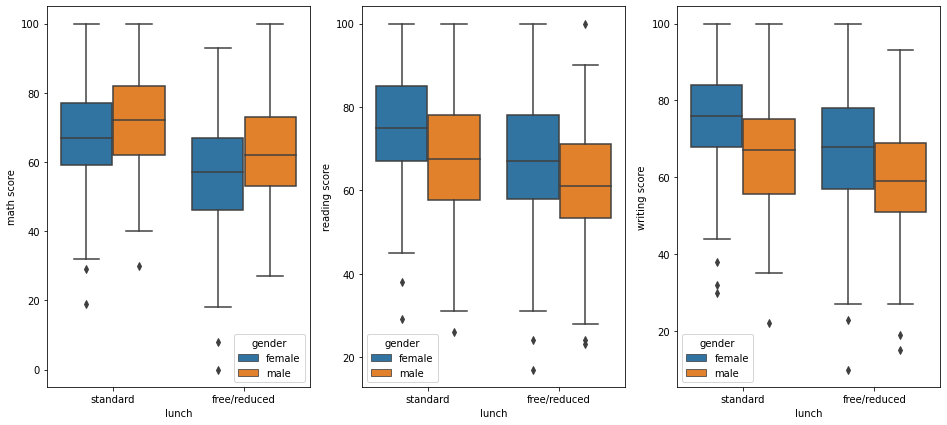

In [99]:

fig, ax = plt.subplots(ncols=3,nrows=1,figsize=(16,7))

sns.boxplot(x='lunch',y='math score', hue='gender', data=df,ax=ax[0])
sns.boxplot(x='lunch',y='reading score', hue='gender', data=df,ax=ax[1])
sns.boxplot(x='lunch',y='writing score', hue='gender', data=df,ax=ax[2])

plt.show()


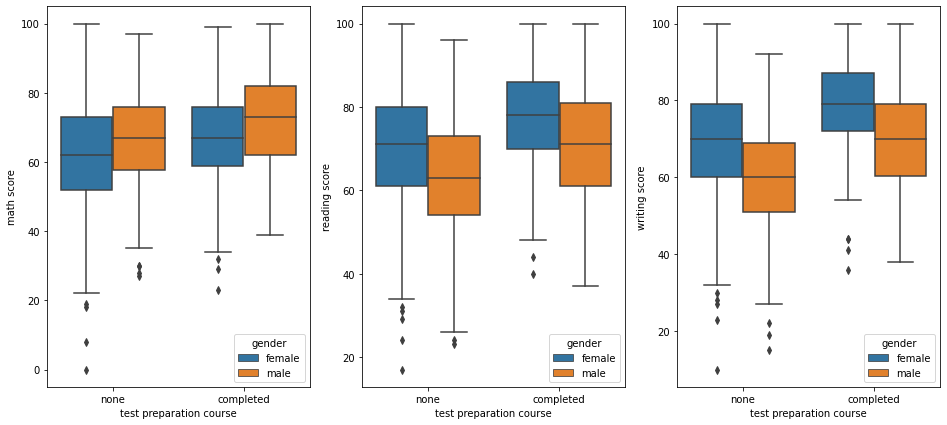

In [100]:
fig, ax = plt.subplots(ncols=3,nrows=1,figsize=(16,7))

sns.boxplot(x='test preparation course',y='math score', hue='gender', data=df,ax=ax[0])
sns.boxplot(x='test preparation course',y='reading score', hue='gender', data=df,ax=ax[1])
sns.boxplot(x='test preparation course',y='writing score', hue='gender', data=df,ax=ax[2])

plt.show()


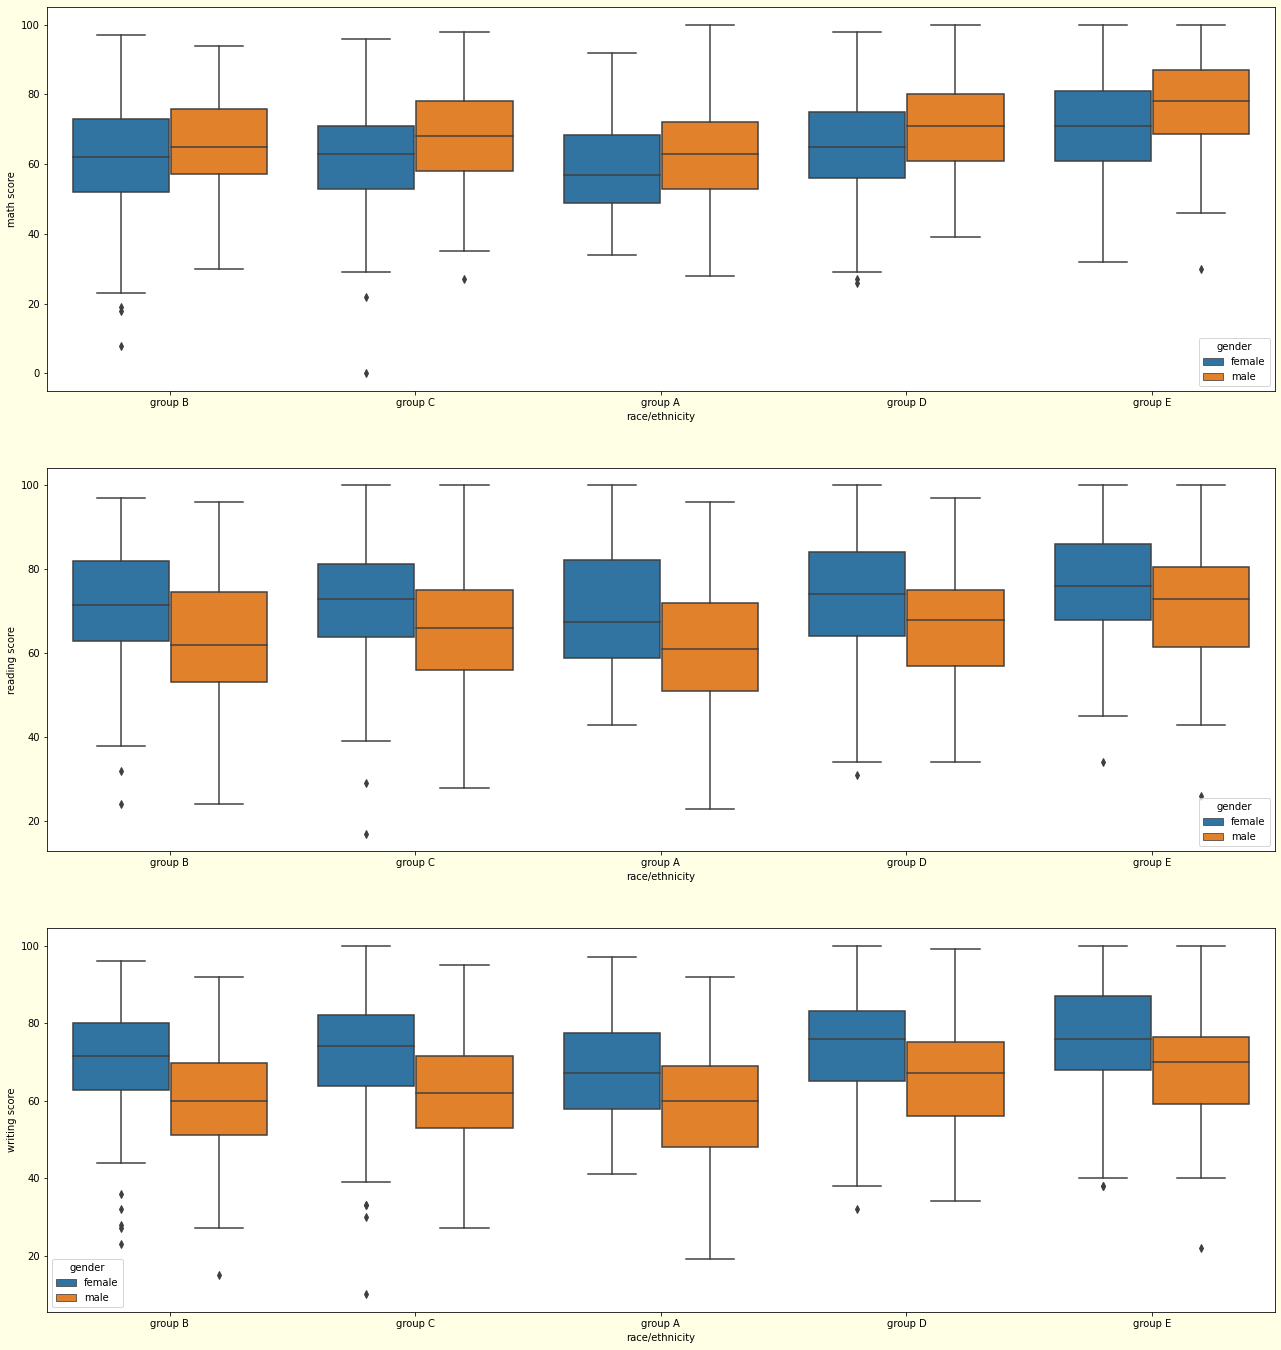

In [112]:

fig, ax = plt.subplots(ncols=1,nrows=3,figsize=(22,24))

sns.boxplot(x='race/ethnicity',y='math score', hue='gender', data=df,ax=ax[0])
sns.boxplot(x='race/ethnicity',y='reading score', hue='gender', data=df,ax=ax[1])
sns.boxplot(x='race/ethnicity',y='writing score', hue='gender', data=df,ax=ax[2])

plt.show()


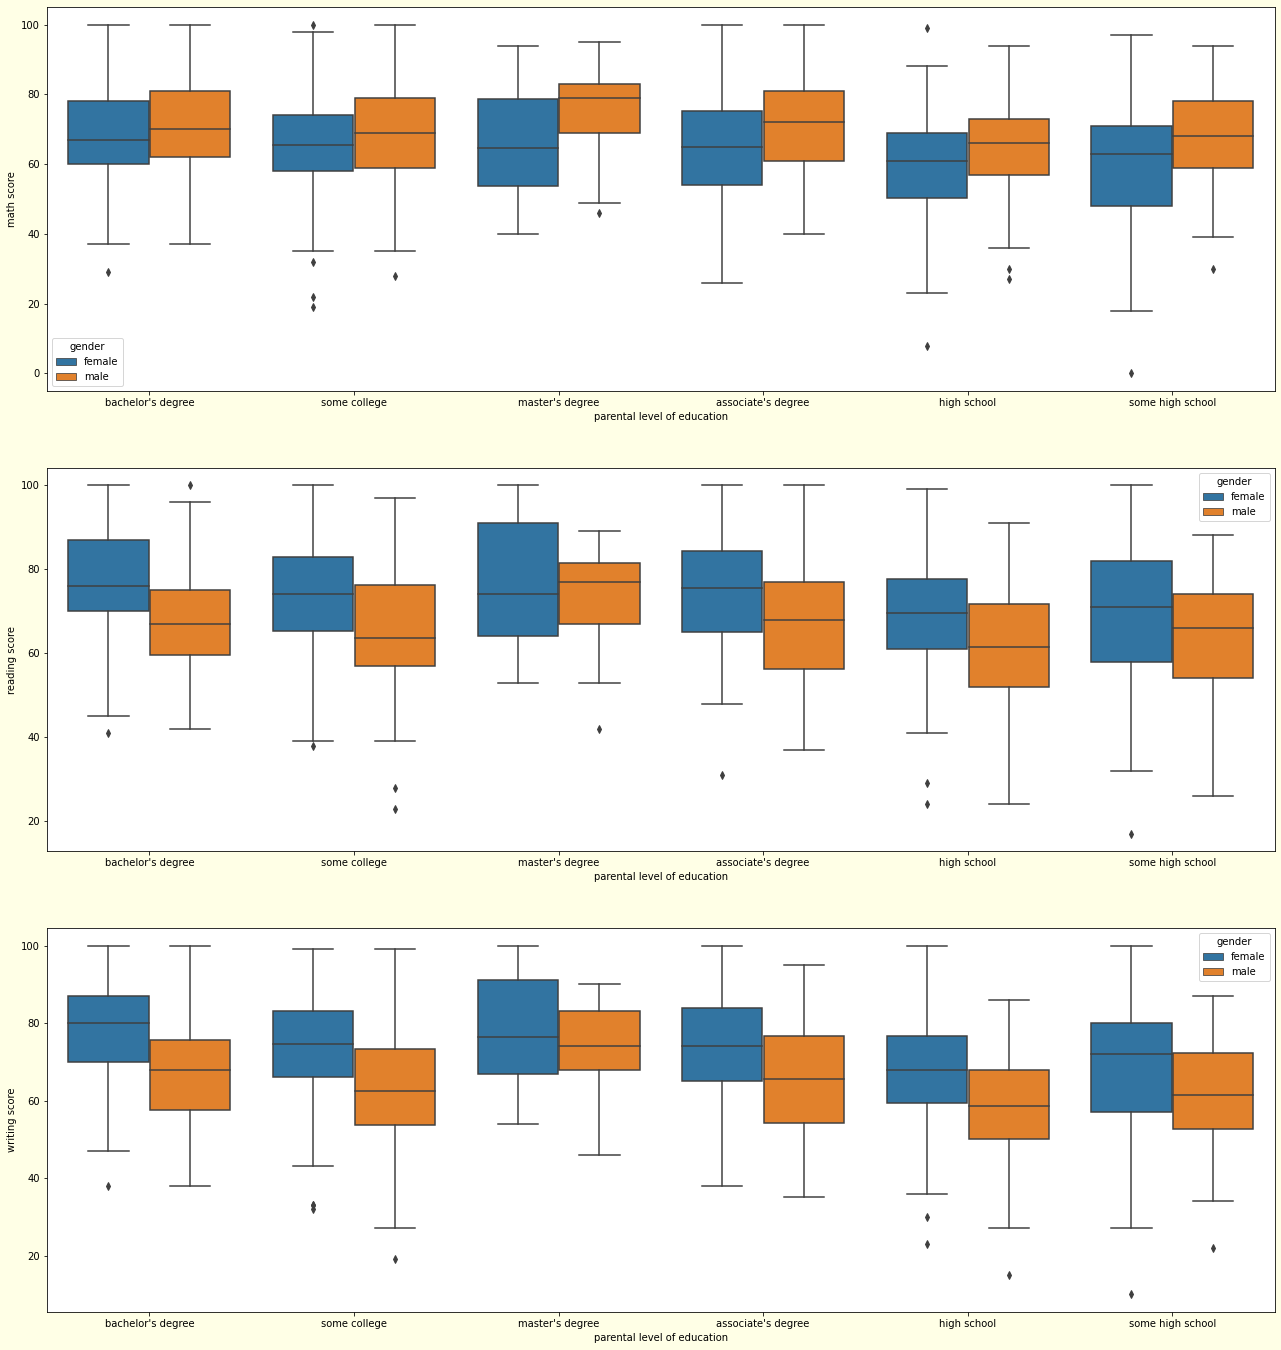

In [111]:
plt.rcParams['figure.facecolor'] = "#ffffe6"


fig, ax = plt.subplots(ncols=1,nrows=3,figsize=(22,24))


sns.boxplot(x='parental level of education',y='math score', hue='gender', data=df,ax=ax[0])
sns.boxplot(x='parental level of education',y='reading score', hue='gender', data=df,ax=ax[1])
sns.boxplot(x='parental level of education',y='writing score', hue='gender', data=df,ax=ax[2])

plt.show()




## Influence of parent's educational background on student scores



parental level of education
associate's degree    67.882883
bachelor's degree     69.389831
high school           62.137755
master's degree       69.745763
some college          67.128319
some high school      63.497207
Name: math score, dtype: float64


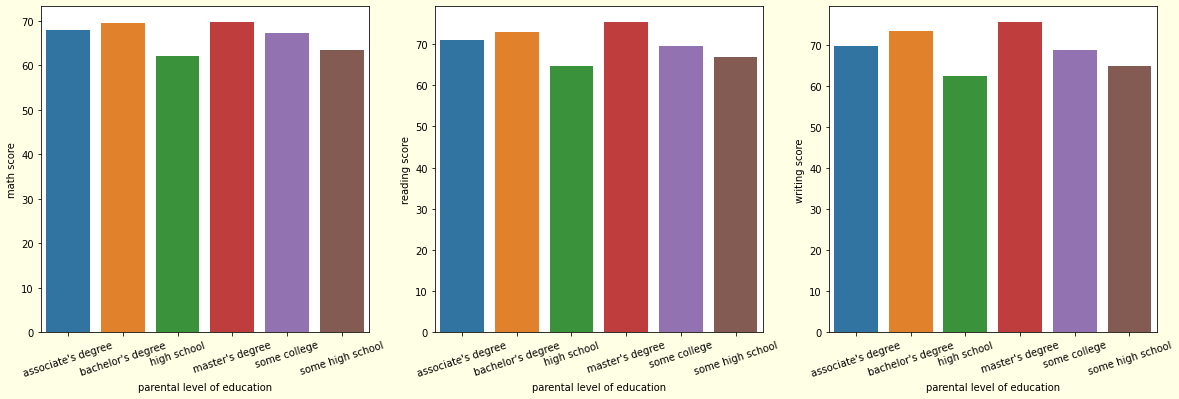

In [144]:

eb_ms_m = df.groupby('parental level of education')['math score'].mean()
eb_rs_m = df.groupby('parental level of education')['reading score'].mean()
eb_ws_m = df.groupby('parental level of education')['writing score'].mean()

fig, ax = plt.subplots(ncols=3,nrows=1,figsize=(20,6))

print(eb_ms_m)

sns.barplot(x=eb_ms_m.index,y=eb_ms_m,ax=ax[0])
ax[0].tick_params(axis='x',rotation=18)
sns.barplot(x=eb_rs_m.index,y=eb_rs_m,ax=ax[1])
ax[1].tick_params(axis='x',rotation=18)
sns.barplot(x=eb_ws_m.index,y=eb_ws_m,ax=ax[2])
ax[2].tick_params(axis='x',rotation=18)

plt.show()


